<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/Clase_2_Self_driving_cab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook veremos un ejemplo sencillo de cómo programar un taxi automático usando técnicas de Reinforcement Learning.

Para empezar, instalamos la libreria OpenAI Gym, que nos proporciona todos los elementos que necesitamos (acciones, estados, recompensas).

In [1]:
!pip install cmake 'gym[atari]' scipy

INFO: pip is looking at multiple versions of gym[atari] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827727 sha256=4423bed9fccbbe52fe5c67d0f7101c6695de621c073f65e0a4b6c5641b5940e7
  Stored in directory: /root/.cache/pip/wheels/1c/77/9e/9af5470201a0b0543937933ee99ba884cd237d2faefe8f4d37
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.11.0
    Uninstalling ale-py-0.11.0:
      Successfully uninstalled 

In [2]:
import gym
import numpy as np

env = gym.make("Taxi-v3").env

In [5]:
# Set seed for experiment reproducibility
seed = 42
env.seed(seed)
np.random.seed(seed)

AttributeError: 'TaxiEnv' object has no attribute 'seed'

Con el método "render" podemos visualizar el entorno:

In [ ]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



El rectangulo representa el taxi, y será amarillo cuando esté sin pasajero y verde con pasajero.

Las líneas continuas ("|") representan paredes, que el taxi no puede cruzar.

R, G, Y, B son las posibles posiciones de recogida y destino. La letra azul representa la posición actual de recogida del pasajero y la letra morada es el destino.

Visualizamos el conjunto de acciones y estados posibles:

In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


Cómo ya hemos visto, tenemos un action space de tamaño 6 y un state space de tamaño 500.

Nuestro algoritmo de Reinforcement Learning no necesitará más información que esta.
Todo lo que necesitamos es una forma de identificar un estado de manera única, asignando un número único a cada estado posible.

Recordemos que los 500 estados corresponden a una codificación de la posición del taxi (5x5), la posición del pasajero (x5) y el destino (x4).

Con env.s podemos ver a qué número entre 0 y 499 corresponde el estado actual:

In [ ]:
state = env.s
print("State:", state)

State: 162


In [ ]:
env.__()

state = env.s
print("State:", state)

env.__()

De hecho, podemos considerar nuestra ilustración anterior, codificar su estado y dárselo al entorno para que se renderice en Gym.

Tenemos el taxi en la fila 3, columna 1, nuestro pasajero está en la posición 2 y nuestro destino es la posición 0.

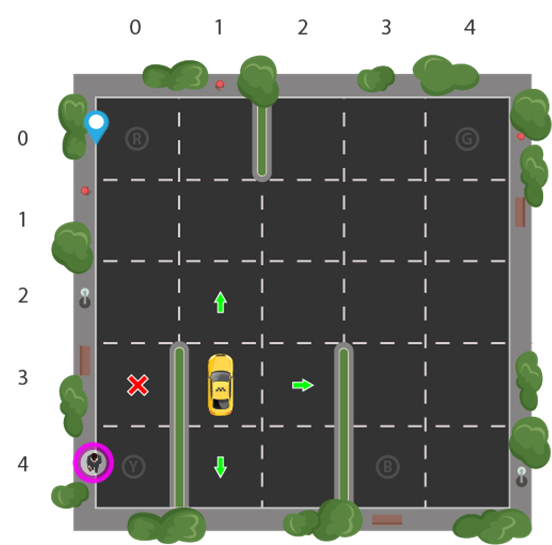

Usando el método de codificación de estado ("encode"), podemos hacer lo siguiente:

In [ ]:
env.reset()

state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Estamos usando las coordenadas de nuestra imagen para generar un número correspondiente a un estado entre 0 y 499, que resulta ser 328.

Hemos visto que el action space es el conjunto de acciones posibles (6).

In [ ]:
env.action_space

Discrete(6)

El metodo "sample" nos devuelve una accion entre las 6 disponibles:

0 = sur
1 = norte
2 = este
3 = oeste
4 = recoger
5 = dejar

In [ ]:
action = env.action_space.sample()
action

2

# ¡Nos movemos!

Supongamos que queremos movernos hacia el norte:

In [ ]:
action = 1

Con "step" veremos qué pasa si realizamos la acción elegida:

In [ ]:
state, reward, done, info = env.step(action)

In [ ]:
print(state, reward, done, info)

348 -1 False {'prob': 1.0}


1.   El primer elemento es el nuevo estado.

2.   El segundo elemento es la recompensa. Todas las acciones de movimiento tienen una recompensa de -1 (es nuestra penalización pequeña por no llegar a destino después de cada movimiento) y las acciones de recoger/dejar tienen una recompensa de -10 en este estado en particular. Si estaramos en un estado donde el taxi tiene un pasajero y está encima del destino correcto, veríamos una recompensa de 20 en la acción "dejar".

3.   El tercer elemento, en este caso "False", nos indica si hemos dejado al pasajero en el destino correcto.

4.   El cuarto elemento es la probabilidad, que en este contexto será siempre 1.

Visualizamos el nuevo estado:

In [ ]:
print("State:", state)

env.s = state
env.render()

State: 348
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


In [ ]:
state, reward, done, info = env.step(1)

print("State:", state)

env.s = state
env.render()

State: 16
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [ ]:
state, reward, done, info = env.step(5)
print(state, reward, done, info)

0 20 True {'prob': 1.0}


In [ ]:
env.s = state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


# Tabla de recompensas

Otro elemento que importamos con el entorno de OpenAI Gym es la tabla de recompensas.

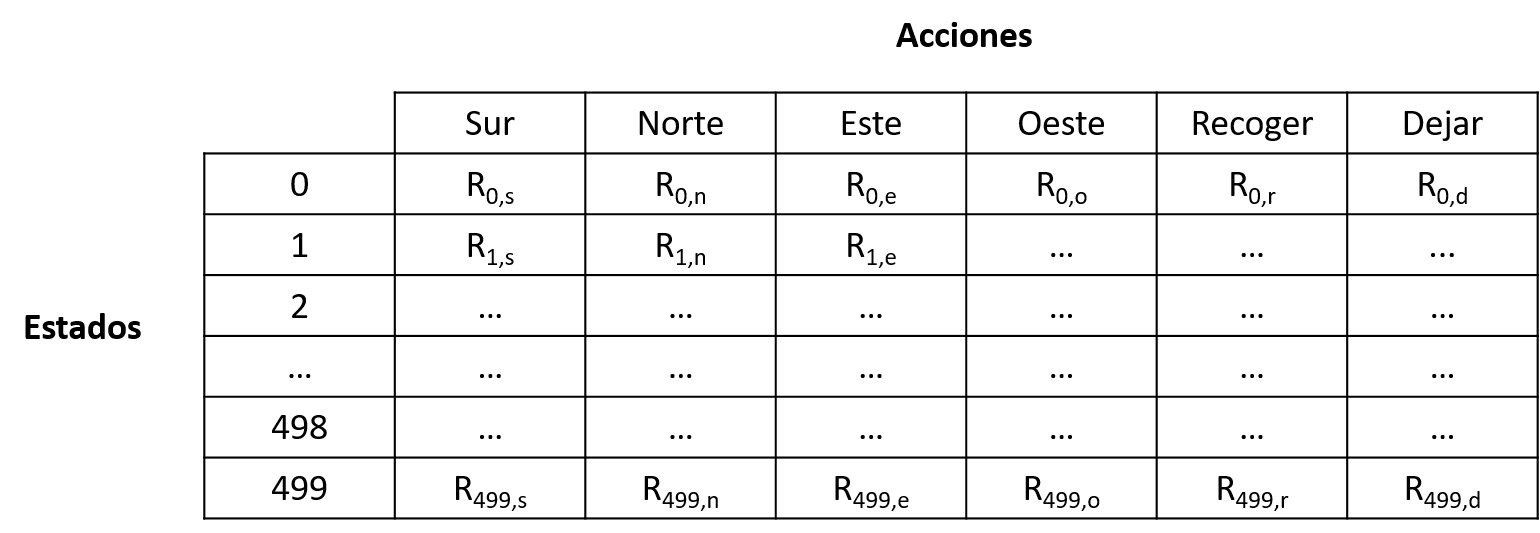

La matriz de recompensas iniciales se llama P, y tiene dimensión (500x6).

Podemos ver los valores de recompensa predeterminados asignados al estado de nuestra ilustración:

In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

1.   El primer número corresponde a las acciones: 0 = sur
1 = norte
2 = este
3 = oeste
4 = recoger
5 = dejar

2.   El segundo número corresponde a la probabilidad, que en este caso es siempre 1.

3.   El tercer número es el siguiente estado, en el que estaríamos si tomaramos esa acción.

4.   El cuarto número es la recompensa. Todas las acciones de movimiento tienen una recompensa de -1 (es nuestra pensalización pequeña por no llegar a destino después de cada movimiento) y las acciones de recoger/dejar tienen una recompensa de -10 en este estado en particular. Si estaramos en un estado donde el taxi tiene un pasajero y está encima del destino correcto, veríamos una recompensa de 20 en la acción "dejar".

5.  El último elemento, es este caso siempre "False", nos indica si hemos dejado al pasajero en el destino correcto.

Vemos que en este caso no hay penalización especial por ir contra la pared (oeste). Simplemente cuenta cómo perder tiempo.

Teniendo la tabla de recompensa predeterminadas, podemos evaluar cómo se comporta nuestro taxi.

Creamos un agente que realizará 10 acciones (iteraremos sobre la variable timestep, que irá hasta 10); cuando acabe, miramos el total de recompensas/penalizaciones recibidas y si ha sido capaz de recoger al pasajero y dejarlo en su destino.



In [ ]:
env.s = 328

timestep, penalties, reward = 0, 0, 0

for timestep in range(10):

  action = env.action_space.sample() # con "sample" elegimos una de las acciones del action_space
  state, reward, done, info = env.step(action) # con "step" realizamos la acción elegida

  if reward == -10:
      penalties += 1 # sumamos una penalización si el taxi intenta dejar al pasajero cuando aún no está a bordo

  timestep += 1

print("Timesteps taken: {}".format(timestep))
print("Penalties incurred: {}".format(penalties))
env.render() # visualizamos el estado final

Timesteps taken: 10
Penalties incurred: 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


Cómo era de esperar, el taxi no ha ni siquiera llegado a recoger al pasajero, y ya ha acumulado un número de penalizaciones.

Y si quisieramos saber cuanto tiempo tardaría nuestro taxi en cumplir su objetivo?

Aquí es dónde aprovecharemos la variable "done", que es la que nos dice si hemos dejado al pasajero en el lugar correcto: en este caso, cogerá valor True.

Recordemos que esta información nos viene ya con el entorno, así que podemos crear un loop infinito que itere hasta que done = True.

In [ ]:
env.s = 328

timestep, penalties, reward = 0, 0, 0

done = False

while not done: # itera hasta que done = True

  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
      penalties += 1

  timestep += 1


print("Timesteps taken: {}".format(timestep))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 1874
Penalties incurred: 628


Si queremos, podemos visualizar el recorrido de nuestro taxi.

Para ello, primero guardamos cada frame en un diccionario:

In [ ]:
frames = [] # for animation

env.s = 328

timestep, penalties, reward = 0, 0, 0

done = False

while not done: # itera hasta que done = True

  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
      penalties += 1

  timestep += 1

  # Put each rendered frame into dict for animation
  frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

print("Timesteps taken: {}".format(timestep))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 523
Penalties incurred: 170


Y luego creamos una función que nos visualice cada frame y toda la info adicional que hemos guardado en el diccionario:

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 523
State: 0
Action: 5
Reward: 20


Nuestro agente tarda muchísimo tiempo en recoger y llevar a un pasajero, además acumulando muchas penalizaciones.

Esto es porque el agente no está aprendiendo de sus errores: en cada momento toma una acción y recibe una recompensa o penalización, pero no tiene memoria de si esa acción fue optima en ese determinado estado.

Aprender de la experiencia es exactamente el objetivo del Reinforcement Learning.

# Q-learning

El algoritmo Q-learning se encargará de crear la "memoria" de nuestro agente.
El taxi aprenderá cuál es la acción optima en cada estado, para llegar a conseguir su objetivo en el menor tiempo posible.

Para ello, necesitaremos una tabla parecida a la tabla de recompensas, que se llama Q-table.

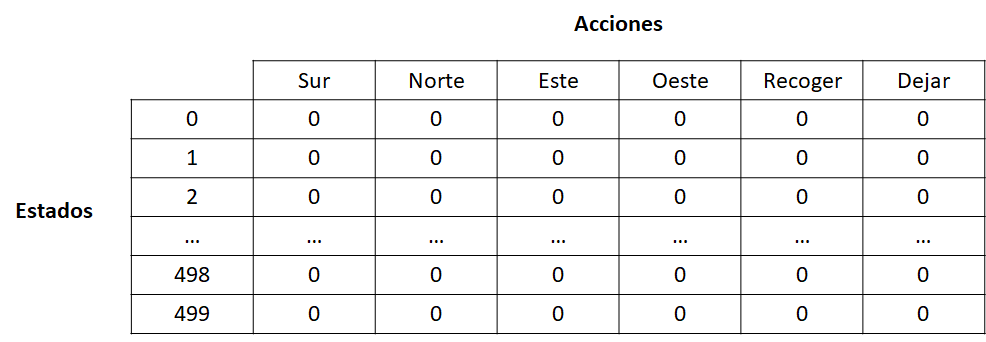

La tabla Q tiene las mismas dimensiones que la tabla de recompensas, pero se inicializa a 0.

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
q_table[328]

array([0., 0., 0., 0., 0., 0.])

Definimos la greedy policy, de manera muy parecida a lo que hicimos para el k-bandit:

In [ ]:
#trade-off entre explorar y explotar
def greedy(epsilon,q_table,state,env):
    if rd.random() < epsilon:
        action=env.action_space.sample() #explorar
    else:
        action=np.argmax(q_table[state]) #explotar
    return action

Entrenamos nuestro agente con 10000 "episodes". Un episodio empieza con un nuevo pasajero y termina cuando el pasajero llega a su destino.

In [ ]:
import random as rd
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1 # tasa de aprendizaje
gamma = 0.6 # tasa de descuento
epsilon = 0.2 # greedy policy

episodes = 100001

for i in range(episodes):
    state = env.reset() # empezamos con un nuevo episodio

    timestep, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = greedy(epsilon,q_table,state,env) # aplicamos la greedy policy

        next_state, reward, done, info = env.step(action) # tomamos la acción elegida

        old_value = q_table[state, action] # en la Q-table, tomamos el valor Q de la acción elegida para el estado actual
        next_max = np.max(q_table[next_state]) # en la Q-table, tomamos el máximo entre los valores Q para el nuevo estado

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # actualizamos el valor Q
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        timestep += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



In [ ]:
q_table[328]

array([-2.33624673, -2.27325905, -2.33099043, -2.32362073, -6.26605922,
       -5.11259526])

 Ahora que hemos actualizado la Q-table, podemos ver cómo se comporta nuestro agente según lo que ha aprendido.

 Ya no necesitamos explorar, así que cambiamos la greedy policy: la acción elegida será siempre la que tiene mayor Q-value.


In [ ]:
total_timesteps, total_penalties = 0, 0
episodes = 100

for i in range(100):
    state = env.reset()
    timestep, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        timestep += 1

    total_penalties += penalties
    total_timesteps += timestep

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_timesteps / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.93
Average penalties per episode: 0.0


Si comparamos estos resultados con los de nuestro agente que no aprendía de la tabla Q:


In [ ]:
total_timesteps, total_penalties = 0, 0
episodes = 100

for i in range(episodes):
    state = env.reset()
    timestep, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = env.action_space.sample() # la acción es random, no depende de la Q-table
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        timestep += 1

    total_penalties += penalties
    total_timesteps += timestep

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_timesteps / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 2324.84
Average penalties per episode: 751.41


Una encuesta de Nature de 2016 indicó que más del 70% de los investigadores han intentado y no han podido reproducir los experimentos de otro científico, y más de la mitad no han podido reproducir sus propios experimentos.

OpenAI se creó para eliminar este problema de falta de estandarización, junto con el objetivo de crear mejores puntos de referencia al ofrecer un número versátil de entornos con una gran facilidad de configuración.

El objetivo de esta herramienta es aumentar la reproducibilidad en el campo de la IA y proporcionar herramientas con las que todos puedan aprender los conceptos básicos de la IA.

In [ ]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp